In [12]:
%load_ext autoreload
%autoreload 2

from scipy.sparse import dia_matrix
import inspect
from astropy.table import Table
import numpy as np  
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Button, Layout, jslink, IntText, IntSlider, interactive, interact, HBox, Layout, VBox
%matplotlib widget


# widgets.FloatRangeSlider(value=[5, 7.5],readout_format='.3f')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


interactive(children=(IntRangeSlider(value=(50, 50), description='RN', layout=Layout(width='500px'), max=200),…

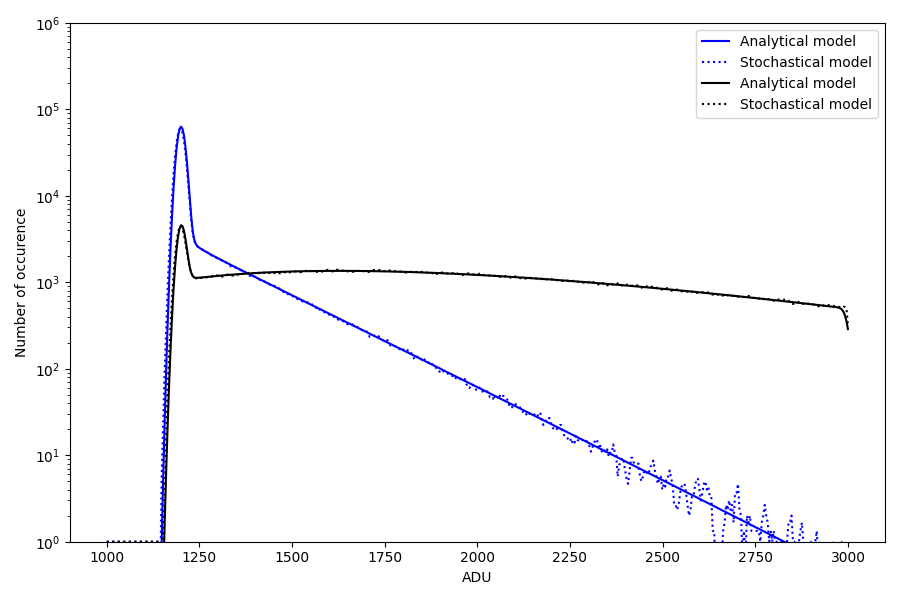

In [14]:
sys.path.append("../../../../pyds9plugin")
from pyds9plugin.Macros.Fitting_Functions.functions import EMCCD, EMCCDhist


emgain=800
RN=50
flux=0.3
smearing1, smearing2 = 0,0.8
sCIC=0.01
x=np.linspace(1000,3000,500)



fig, ax = plt.subplots(figsize=(9,6))
anal1=ax.semilogy(x,10**EMCCD(x, bias=1200, RN=RN, EmGain=emgain, flux=flux, smearing=smearing1, sCIC=sCIC),c='b',label='Analytical model')
stoch1=ax.semilogy(x,10**EMCCDhist(x, bias=1200, RN=RN, EmGain=emgain, flux=flux, smearing=smearing1, sCIC=sCIC),':',c='b',label='Stochastical model')

anal2=ax.semilogy(x,10**EMCCD(x, bias=1200, RN=RN, EmGain=emgain, flux=flux, smearing=smearing2, sCIC=sCIC),c='k',label='Analytical model')
stoch2=ax.semilogy(x,10**EMCCDhist(x, bias=1200, RN=RN, EmGain=emgain, flux=flux, smearing=smearing2, sCIC=sCIC),':',c='k',label='Stochastical model')
ax.legend(loc='upper right')
ax.set_xlabel('ADU')
ax.set_ylabel('Number of occurence')
ax.set_ylim((1,1e6))
fig.tight_layout()

def view_image( RN, EmGain, flux_w, smearing, sCIC):#,SmearExpDecrement):
    # with widgets.Output():
    flux1, flux2 = flux_w
    RN1, RN2 = RN
    EmGain1, EmGain2 = EmGain
    smearing1,smearing2=smearing
    sCIC1,sCIC2=sCIC
    # exp1,exp2 = SmearExpDecrement
    stoch1 = EMCCDhist(x, 1200, RN1, EmGain1, flux1, smearing1, sCIC1)#,SmearExpDecrement=10**exp1)
    stoch2 = EMCCDhist(x, 1200, RN2, EmGain2, flux2, smearing2, sCIC2)#,SmearExpDecrement=10**exp2)
    anal1 = EMCCD(x, 1200, RN1, EmGain1, flux1, smearing1, sCIC1)#,SmearExpDecrement=10**exp1)
    anal2 = EMCCD(x, 1200, RN2, EmGain2, flux2, smearing2, sCIC2)#,SmearExpDecrement=10**exp2)
    ax.lines[0].set_data(x,10**anal1)
    ax.lines[1].set_data(x,10**stoch1)

    ax.lines[2].set_data(x,10**anal2)
    ax.lines[3].set_data(x,10**stoch2)

 
rn_w = widgets.IntRangeSlider( min=0, max=200,value=[RN,RN], layout=Layout(width='500px'))
gain_w = widgets.IntRangeSlider( min=500, max=1500,value=[emgain,1500], layout=Layout(width='500px'))

flux_w =  widgets.FloatRangeSlider(value=[flux, 3],min=0.001,max=5,step=0.001,readout_format='.1e', layout=Layout(width='500px'))
smearing_w =  widgets.FloatRangeSlider( min=0.0, max=1,value=[0,0], layout=Layout(width='500px'),readout_format='.1e')
sCIC_w =  widgets.FloatRangeSlider( min=0.0, max=0.3,value=[sCIC,sCIC],step=0.001, layout=Layout(width='500px'),readout_format='.1e')
# exp_w = widgets.FloatRangeSlider( min=3, max=5,value=[4,4], layout=Layout(width='500px'))

a = interact(view_image, RN=rn_w, EmGain=gain_w, flux_w=flux_w, smearing=smearing_w, sCIC=sCIC_w)#,SmearExpDecrement=exp)

In [21]:

fig, ax = plt.subplots(figsize=(12,8))
l=ax.semilogy(x,10**EMCCDhist(x, bias=1200, RN=RN, EmGain=emgain, flux=flux, smearing=smearing1, sCIC=sCIC))
l2=ax.semilogy(x,10**EMCCDhist(x, bias=1200, RN=RN, EmGain=emgain, flux=flux, smearing=smearing2, sCIC=sCIC))
ax.set_xlabel('ADU')
ax.set_xlabel('ADU')
fig.tight_layout()
# plt.show()


# @widgets.interact(bias=(1000, 2000,1194), RN=(0.,200.,53.), EmGain=(100, 10000,5000), flux=(0.001, 1,0.04), smearing=(0, 3,0.31), sCIC=(0,1,0.1))
def view_image( RN, EmGain, flux, smearing, sCIC):#,SmearExpDecrement):
    # with widgets.Output():
    flux1, flux2 = flux
    RN1, RN2 = RN
    EmGain1, EmGain2 = EmGain
    smearing1,smearing2=smearing
    sCIC1,sCIC2=sCIC
    # exp1,exp2 = SmearExpDecrement
    emccd = EMCCDhist(x, 1200, RN1, EmGain1, flux1, smearing1, sCIC1)#,SmearExpDecrement=10**exp1)
    emccd2 = EMCCDhist(x, 1200, RN2, EmGain2, flux2, smearing2, sCIC2)#,SmearExpDecrement=10**exp2)
    ax.lines[0].set_data(x,10**emccd)
    ax.lines[1].set_data(x,10**emccd2)


 
rn_w = widgets.IntRangeSlider( min=0, max=200,value=[RN,RN], layout=Layout(width='500px'))
gain_w = widgets.IntRangeSlider( min=500, max=1500,value=[emgain,emgain], layout=Layout(width='500px'))

flux_w =  widgets.FloatRangeSlider(value=[flux, flux],min=0.001,max=1,step=0.001,readout_format='.1f', layout=Layout(width='500px'))
smearing_w =  widgets.FloatRangeSlider( min=0.0, max=3,value=[smearing1,smearing2], layout=Layout(width='500px'),readout_format='.2f')
sCIC_w =  widgets.FloatRangeSlider( min=0.0, max=1,value=[sCIC,sCIC], layout=Layout(width='500px'),readout_format='.2f')
exp_w = widgets.FloatRangeSlider( min=3, max=5,value=[4,4], layout=Layout(width='500px'))
a = interact(view_image, RN=rn_w, EmGain=gain_w, flux=flux_w, smearing=smearing_w, sCIC=sCIC_w)#,SmearExpDecrement=exp)

TypeError: super(type, obj): obj must be an instance or subtype of type

In [189]:
np.savetxt("/tmp/xy.txt", np.array([x,np.log10(y)]).T)



/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_11197/3676130398.py:35: RuntimeWarning: invalid value encountered in log10
  np.savetxt("/tmp/xy.txt", np.array([x, np.log10(np.log10(y))]).T)


0.028665806249461488 0.047874971894621546
6.002233037332847


interactive(children=(IntRangeSlider(value=(47, 47), description='RN', layout=Layout(width='500px'), max=200),…

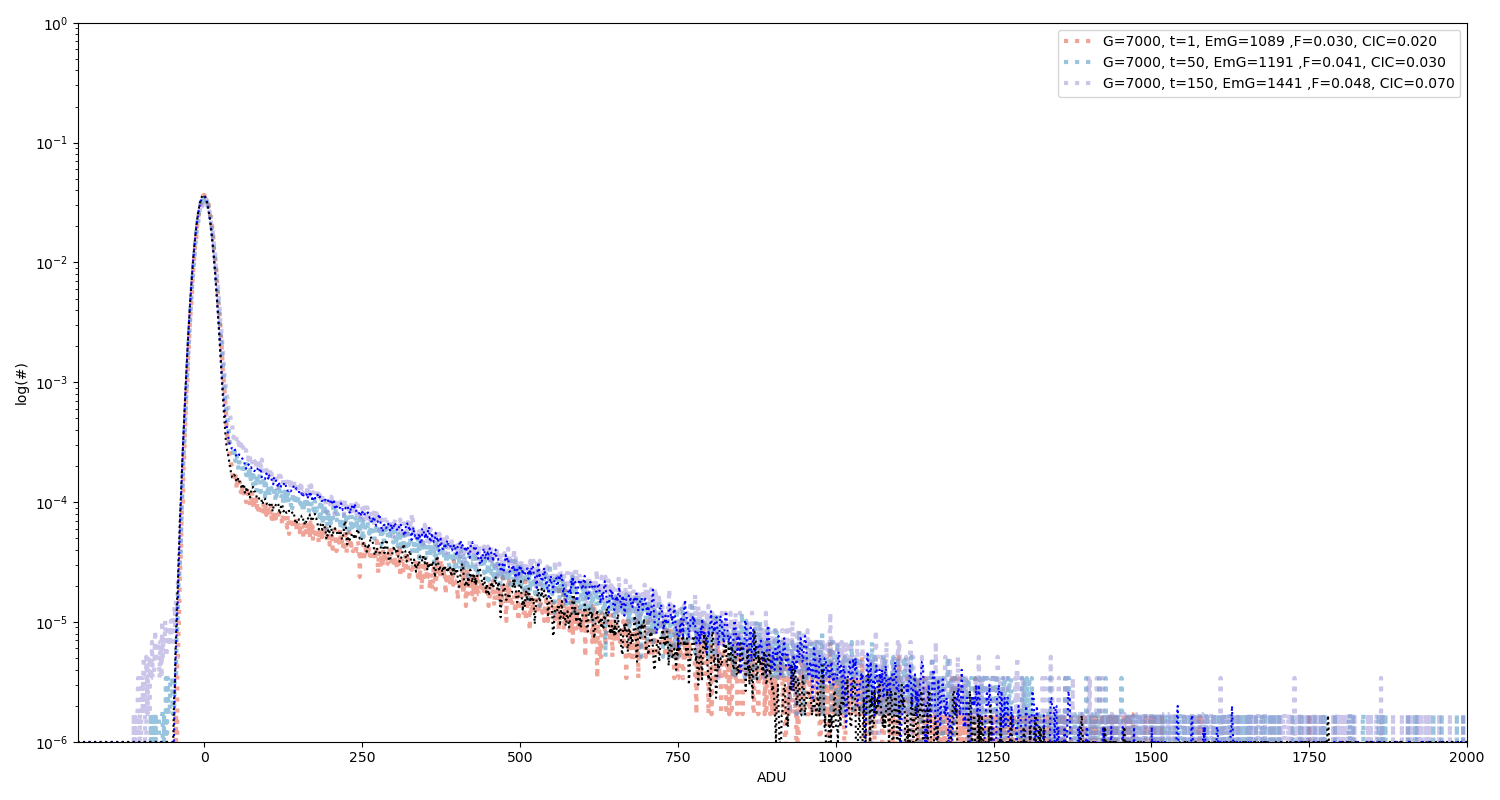

In [205]:
cat = Table.read('/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/DetectorData/220204_darks_T183_1MHz/7000/HeaderCatalogFIREBall.ecsv')
from pyds9plugin.Macros.Fitting_Functions.functions import EMCCD, EMCCDhist

# cat = Table.read('/Users/Vincent/Nextcloud/LAM/FIREBALL/2022/DetectorData/220204_darks_T183_1MHz/HeaderCatalog.ecsv')

colors= ['#E24A33','#348ABD','#988ED5','#777777','#FBC15E','#8EBA42','#FFB5B8'] + ['#E24A33','#348ABD','#988ED5','#777777','#FBC15E','#8EBA42','#FFB5B8']
np.seterr(divide = 'ignore') 
lw=3
fig,ax = plt.subplots(figsize=(15,8))
gains=7000
for gain,ls,off in zip([gains],[':',':'],[0,2]):
    texps = np.sort(np.array(np.unique(cat['EXPTIME']),dtype=float))
    texps.sort()
    for texp,c,cic in zip([1,50,150],colors,[0.02,0.03,0.07]):#texps
        subcat = cat[(cat['EMGAIN']==gain) & (cat['EXPTIME']==texp)]
        # print(len(subcat),texp,gain)
        if (len(subcat)>0) & (int(gain)>0) :#& (int(texp) in [1,5,50,150]):
            bias=np.mean(subcat['bias_fit'])
            ron=np.mean(subcat['RON'])
            EmGain=np.median(subcat['gain_ls'])
            flux=np.median(subcat['flux_ls'])
            
            l = 'G=%s, t=%s, EmG=%i ,F=%0.3f, CIC=%0.3f'%(gain,texp,EmGain,flux,cic)
            x,y = np.mean(np.array(subcat['bins']),axis=0), np.median(np.array(subcat['hist']),axis=0)#)
            l1=ax.semilogy(x,y/y.sum(),label=l,lw=lw,ls=ls,c=c,alpha=0.5)
            model = EMCCDhist(x,bias,ron,EmGain,flux*np.log(2),0.00,cic)
            constant = np.nanmax(y)/np.nanmax(model)
            # l2=ax.plot(x,model*constant+off,lw=lw,ls='-',c=c)
            # model_to_fit_stochastic_smearing_cic = lambda bin_center,cic : EMCCDhist(bin_center,bias,ron,EmGain,flux*np.log(2),0,cic )*constant+off
            # p0=[0.08]
            # mask_smearing_CIC = (x>1200)&(x<1350)&(np.log10(y)>0)
            # popt2, pcov2 = curve_fit(model_to_fit_stochastic_smearing_cic,x[mask_smearing_CIC],np.log10(y[mask_smearing_CIC]),p0=p0,method='dogbox',bounds=([0],[1]))#,bounds=([0,0],[1,1])
            # print(popt2)
            # ax.plot(x[mask_smearing_CIC],model_to_fit_stochastic_smearing_cic(x[mask_smearing_CIC],*popt2))
np.savetxt("/tmp/xy.txt", np.array([x, np.log10(np.log10(y))]).T)
from pyds9plugin.Macros.Fitting_Functions.functions import EMCCD, EMCCDhist
ax.legend()#ncol=len(gains))
ax.set_xlim(xmin=-200,xmax=2000)
ax.set_ylim(ymin=1e-6,ymax=1)
ax.set_xlabel('ADU')
ax.set_ylabel('log(#)')
fig.tight_layout()


bias = x[np.argmax(y)]#cat['bias'])
RN= np.mean(cat['RON'])
Emgain= np.mean(cat['gain_ls'][cat['EMGAIN']==gains])
flux1, flux2= np.mean(cat['flux_ls'][(cat['EMGAIN']==gains) & (cat['EXPTIME']==texps[0])]), np.mean(cat['flux_ls'][(cat['EMGAIN']==gains) & (cat['EXPTIME']==texps[-1])])
CIC1, CIC2= np.mean(cat['sCIC_ls'][(cat['EMGAIN']==gains) & (cat['EXPTIME']==texps[0])]), np.mean(cat['sCIC_ls'][(cat['EMGAIN']==gains) & (cat['EXPTIME']==texps[-1])])

print(flux1, flux2)
y1 = 10**EMCCDhist(x, bias=bias, RN=RN, EmGain=emgain, flux=flux1, smearing=0, sCIC=CIC1)
y2 = 10**EMCCDhist(x, bias=bias, RN=RN, EmGain=emgain, flux=flux2, smearing=0, sCIC=CIC2)
print(np.log10(y2.sum()))
anal1=ax.semilogy(x,y1/y1.sum(),'b:',label='Analytical model')
anal2=ax.semilogy(x,y2/y2.sum(),'k:',label='Analytical model')
# stoch1=ax.semilogy(x,10**EMCCDhist(x, bias=1200, RN=RN, EmGain=emgain, flux=flux, smearing=smearing1, sCIC=sCIC),':',c='b',label='Stochastical model')
# stoch2=ax.semilogy(x,10**EMCCDhist(x, bias=1200, RN=RN, EmGain=emgain, flux=flux, smearing=smearing2, sCIC=sCIC),':',c='k',label='Stochastical model')
# print(x[np.argmax(y1)])
# print(x[np.argmax(y2)])



def view_image( RN, EmGain, flux_w, smearing, sCIC):#,SmearExpDecrement):
    # with widgets.Output():
    flux1, flux2 = flux_w
    RN1, RN2 = RN
    EmGain1, EmGain2 = EmGain
    smearing1,smearing2=smearing
    sCIC1,sCIC2=sCIC
    # exp1,exp2 = SmearExpDecrement
    # stoch1 = EMCCDhist(x, 1200, RN1, EmGain1, flux1, smearing1, sCIC1)#,SmearExpDecrement=10**exp1)
    # stoch2 = EMCCDhist(x, 1200, RN2, EmGain2, flux2, smearing2, sCIC2)#,SmearExpDecrement=10**exp2)
    anal1 = 10**EMCCDhist(x, bias, RN1, EmGain1, flux1, smearing1, sCIC1)#,SmearExpDecrement=10**exp1)
    anal2 = 10**EMCCDhist(x, bias, RN2, EmGain2, flux2, smearing2, sCIC2)#,SmearExpDecrement=10**exp2)
    ax.lines[-1].set_data(x,anal1/anal1.sum())
    ax.lines[-2].set_data(x,anal2/anal2.sum())

style = {}#{'description_width': 'initial'}

rn_w = widgets.IntRangeSlider( min=0, max=200,value=[RN,RN], layout=Layout(width='500px'))
gain_w = widgets.IntRangeSlider( min=500, max=2500,value=[Emgain,Emgain], layout=Layout(width='500px'))
flux_w =  widgets.FloatRangeSlider(value=[flux1,flux2],min=0.001,max=1,step=0.001,readout_format='.1e', layout=Layout(width='500px',max_width='1900pix'),style=style)
smearing_w =  widgets.FloatRangeSlider( min=0.0, max=1,step=0.01,value=[0,0], layout=Layout(width='500px'),readout_format='.1e')
sCIC_w =  widgets.FloatRangeSlider( min=0.0, max=1,value=[CIC1,CIC2], layout=Layout(width='500px'),readout_format='.1e',step=0.01)
a = interact(view_image, RN=rn_w, EmGain=gain_w, flux_w=flux_w, smearing=smearing_w, sCIC=sCIC_w)#,SmearExpDecrement=widgets.FloatRangeSlider( min=3, max=5,value=[4,4], layout=Layout(width='500px')))


In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
gains=[7000]
for gain,ls,off in zip(gains,[':',':'],[0,2]):
    texps = np.sort(np.array(np.unique(cat['EXPTIME']),dtype=float))
    texps.sort()
    for texp,c,cic in zip([1,50,150],colors,[0.02,0.03,0.07]):#texps
        subcat = cat[(cat['EMGAIN']==gain) & (cat['EXPTIME']==texp)]
        if (len(subcat)>0) & (int(gain)>0) :#& (int(texp) in [1,5,50,150]):
            bias=np.mean(subcat['bias_fit'])
            ron=np.mean(subcat['RON'])
            EmGain=np.median(subcat['gain_ls'])
            flux=np.median(subcat['flux_ls'])
            
            l = 'G=%s, t=%s, EmG=%i ,F=%0.3f, CIC=%0.3f'%(gain,texp,EmGain,flux,cic)
            x,y = np.mean(np.array(subcat['bins']),axis=0), np.median(np.array(subcat['hist']),axis=0)#)
            l1=ax.semilogy(x,y/y.sum(),label=l,lw=lw,ls=ls,c=c)#+off
            model = EMCCDhist(x,bias,ron,EmGain,flux*np.log(2),0.00,cic)
            constant = np.nanmax(y)/np.nanmax(model)
            # l2=ax.plot(x,model*constant+off,lw=lw,ls='-',c=c)
            # model_to_fit_stochastic_smearing_cic = lambda bin_center,cic : EMCCDhist(bin_center,bias,ron,EmGain,flux*np.log(2),0,cic )*constant+off
            # p0=[0.08]
            # mask_smearing_CIC = (x>1200)&(x<1350)&(np.log10(y)>0)
            # popt2, pcov2 = curve_fit(model_to_fit_stochastic_smearing_cic,x[mask_smearing_CIC],np.log10(y[mask_smearing_CIC]),p0=p0,method='dogbox',bounds=([0],[1]))#,bounds=([0,0],[1,1])
            # print(popt2)
            # ax.plot(x[mask_smearing_CIC],model_to_fit_stochastic_smearing_cic(x[mask_smearing_CIC],*popt2))
np.savetxt("/tmp/xy.txt", np.array([x, y]).T)
from pyds9plugin.Macros.Fitting_Functions.functions import EMCCD, EMCCDhist
ax.legend(ncol=len(gains))
ax.set_xlim(xmin=1100,xmax=2400)
ax.set_ylim(ymin=1e-6,ymax=1)
ax.set_xlabel('ADU')
ax.set_ylabel('log(#)')
fig.tight_layout()



bias = np.mean(cat['bias'])
RN= np.mean(cat['RON'])
Emgain= np.mean(cat['gain_ls'][cat['EMGAIN']==gains])
flux1, flux2= np.mean(cat['flux_ls'][(cat['EMGAIN']==gains) & (cat['EXPTIME']==texps[0])]), np.mean(cat['flux_ls'][(cat['EMGAIN']==gains) & (cat['EXPTIME']==texps[-1])])
CIC1, CIC2= np.mean(cat['sCIC_ls'][(cat['EMGAIN']==gains) & (cat['EXPTIME']==texps[0])]), np.mean(cat['sCIC_ls'][(cat['EMGAIN']==gains) & (cat['EXPTIME']==texps[-1])])

print(flux1, flux2)
y1 = 10**EMCCD(x, bias=bias, RN=RN, EmGain=emgain, flux=flux1, smearing=0, sCIC=CIC1)
y2 = 10**EMCCD(x, bias=bias, RN=RN, EmGain=emgain, flux=flux2, smearing=0, sCIC=CIC2)
anal1=ax.semilogy(x,y1/y1.sum(),c='b',label='Analytical model')
anal2=ax.semilogy(x,y2/y2.sum(),c='k',label='Analytical model')
# stoch1=ax.semilogy(x,10**EMCCDhist(x, bias=1200, RN=RN, EmGain=emgain, flux=flux, smearing=smearing1, sCIC=sCIC),':',c='b',label='Stochastical model')
# stoch2=ax.semilogy(x,10**EMCCDhist(x, bias=1200, RN=RN, EmGain=emgain, flux=flux, smearing=smearing2, sCIC=sCIC),':',c='k',label='Stochastical model')
# print(x[np.argmax(y1)])
# print(x[np.argmax(y2)])



def view_image( RN, EmGain, flux_w, smearing, sCIC):#,SmearExpDecrement):
    # with widgets.Output():
    flux1, flux2 = flux_w
    RN1, RN2 = RN
    EmGain1, EmGain2 = EmGain
    smearing1,smearing2=smearing
    sCIC1,sCIC2=sCIC
    # exp1,exp2 = SmearExpDecrement
    # stoch1 = EMCCDhist(x, 1200, RN1, EmGain1, flux1, smearing1, sCIC1)#,SmearExpDecrement=10**exp1)
    # stoch2 = EMCCDhist(x, 1200, RN2, EmGain2, flux2, smearing2, sCIC2)#,SmearExpDecrement=10**exp2)
    anal1 = 10**EMCCD(x, bias, RN1, EmGain1, flux1, smearing1, sCIC1)#,SmearExpDecrement=10**exp1)
    anal2 = 10**EMCCD(x, bias, RN2, EmGain2, flux2, smearing2, sCIC2)#,SmearExpDecrement=10**exp2)
    ax.lines[-1].set_data(x,anal1/anal1.sum())
    ax.lines[-2].set_data(x,anal2/anal2.sum())


rn_w = widgets.IntRangeSlider( min=0, max=200,value=[RN,RN], layout=Layout(width='500px'))
gain_w = widgets.IntRangeSlider( min=500, max=1500,value=[Emgain,Emgain], layout=Layout(width='500px'))
flux_w =  widgets.FloatRangeSlider(value=[flux1,flux2],min=0.001,max=1,step=0.001,readout_format='.2f', layout=Layout(width='500px'))
smearing_w =  widgets.FloatRangeSlider( min=0.0, max=1,value=[0,0], layout=Layout(width='500px'),readout_format='.2f')
sCIC_w =  widgets.FloatRangeSlider( min=0.0, max=1,value=[CIC1,CIC2], layout=Layout(width='500px'),readout_format='.2f',step=0.01)
a = interact(view_image, RN=rn_w, EmGain=gain_w, flux_w=flux_w, smearing=smearing_w, sCIC=sCIC_w)#,SmearExpDecrement=widgets.FloatRangeSlider( min=3, max=5,value=[4,4], layout=Layout(width='500px')))



In [3]:


# x=np.linspace(1000,3000,100)
# fig, ax = plt.subplots(figsize=(12,8))
# l=ax.plot(x,EMCCDhist(x, bias=1194, RN=50, EmGain=1000, flux=0.001, smearing=0.0, sCIC=0.01))
# # l2=ax.plot(x,EMCCDhist(x, bias=1194, RN=50, EmGain=1000, flux=0.001, smearing=0.0, sCIC=0.01))

# fig.tight_layout()
# # plt.show()
# from ipywidgets import Button, Layout, jslink, IntText, IntSlider, interactive, interact, HBox, Layout, VBox


# # @widgets.interact(bias=(1000, 2000,1194), RN=(0.,200.,53.), EmGain=(100, 10000,5000), flux=(0.001, 1,0.04), smearing=(0, 3,0.31), sCIC=(0,1,0.1))
# def view_image(bias, RN, EmGain, flux, smearing, sCIC):
#     with widgets.Output():
#         print(bias)
#         emccd = EMCCDhist(x, bias, RN, EmGain, flux, smearing, sCIC)
#     #     ax.plot(x,emccd)
#         ax.lines[0].set_data(x,emccd)

# bias = widgets.IntSlider( min=1e3, max=1.4e3,value=1194)
# rn = widgets.IntSlider( min=0, max=200,value=53)
# gain = widgets.IntSlider( min=1000, max=4000,value=1200)
# flux =  widgets.FloatSlider( min=0.001, max=1,value=0.01)
# smearing =  widgets.FloatSlider( min=0.0, max=3,value=0.0)
# sCIC =  widgets.FloatSlider( min=0.0, max=1,value=0.01)
# a = interact(view_image,bias=bias, RN=rn, EmGain=gain, flux=flux, smearing=smearing, sCIC=sCIC)

In [4]:
# %matplotlib widget

# x=np.linspace(1000,3000,100)
# fig, ax = plt.subplots(figsize=(12,8))
# l=ax.plot(x,EMCCDhist(x, bias=1194, RN=50, EmGain=1000, flux=0.05, smearing=0, sCIC=0))
# fig.tight_layout()
# # plt.show()

# @widgets.interact(bias=(1000, 2000,1194), RN=(0.,200.,53.), EmGain=(100, 10000,5000), flux=(0.001, 1,0.04), smearing=(0, 3,0.31), sCIC=(0,1,0.1))
# def view_image(bias, RN, EmGain, flux, smearing, sCIC):
#     with widgets.Output():
#         print(bias)
#         emccd = EMCCDhist(x, bias, RN, EmGain, flux, smearing, sCIC)
#     #     ax.plot(x,emccd)
#         ax.lines[0].set_data(x,emccd)
# #     fig.canvas.draw()